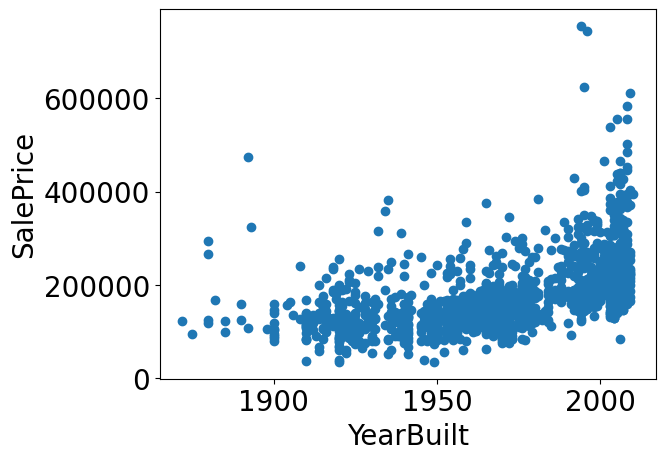

5315842176.754697
loss [2.79103952e+13 2.78979030e+13 2.78854137e+13 ... 3.96815016e+11
 3.98297941e+11 3.99783663e+11], val loss [3.63279226e+13 3.63136835e+13 3.62994472e+13 ... 2.04481152e+10
 2.01583042e+10 1.98712847e+10]


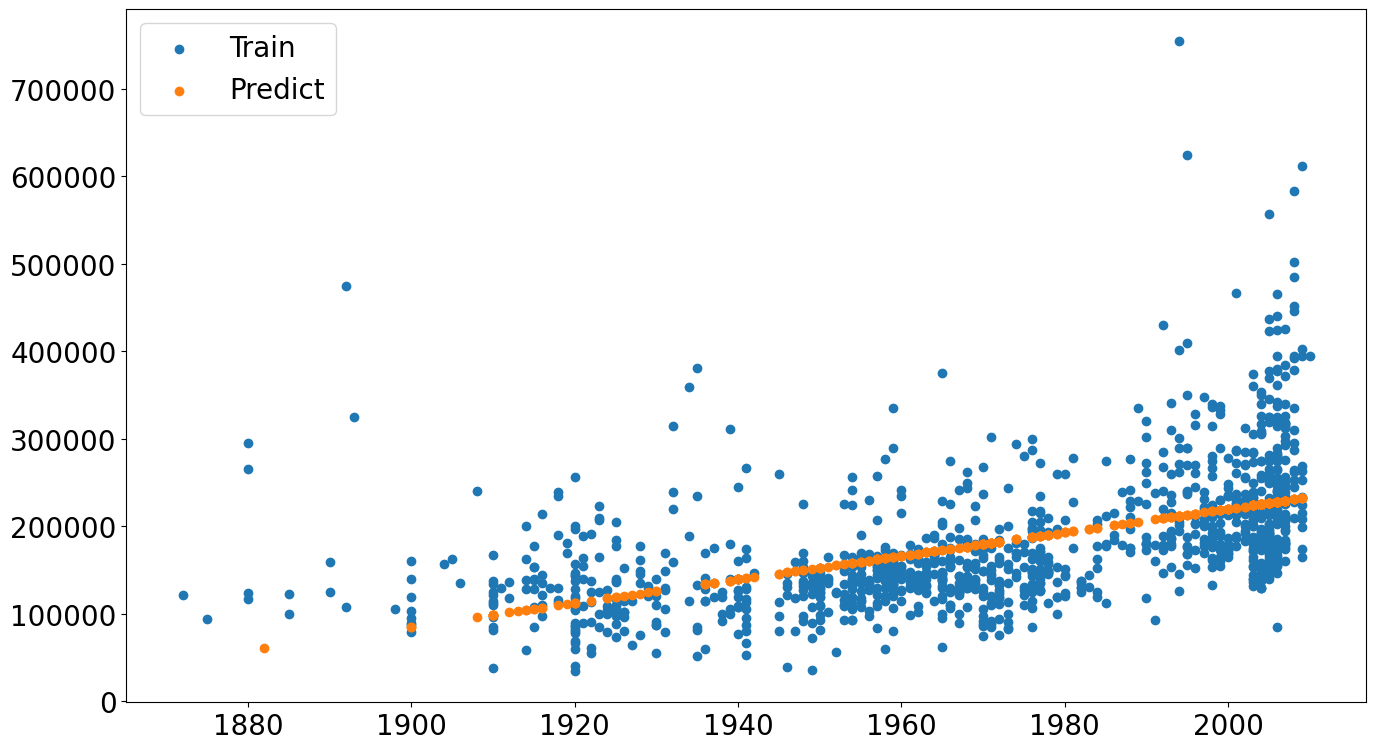

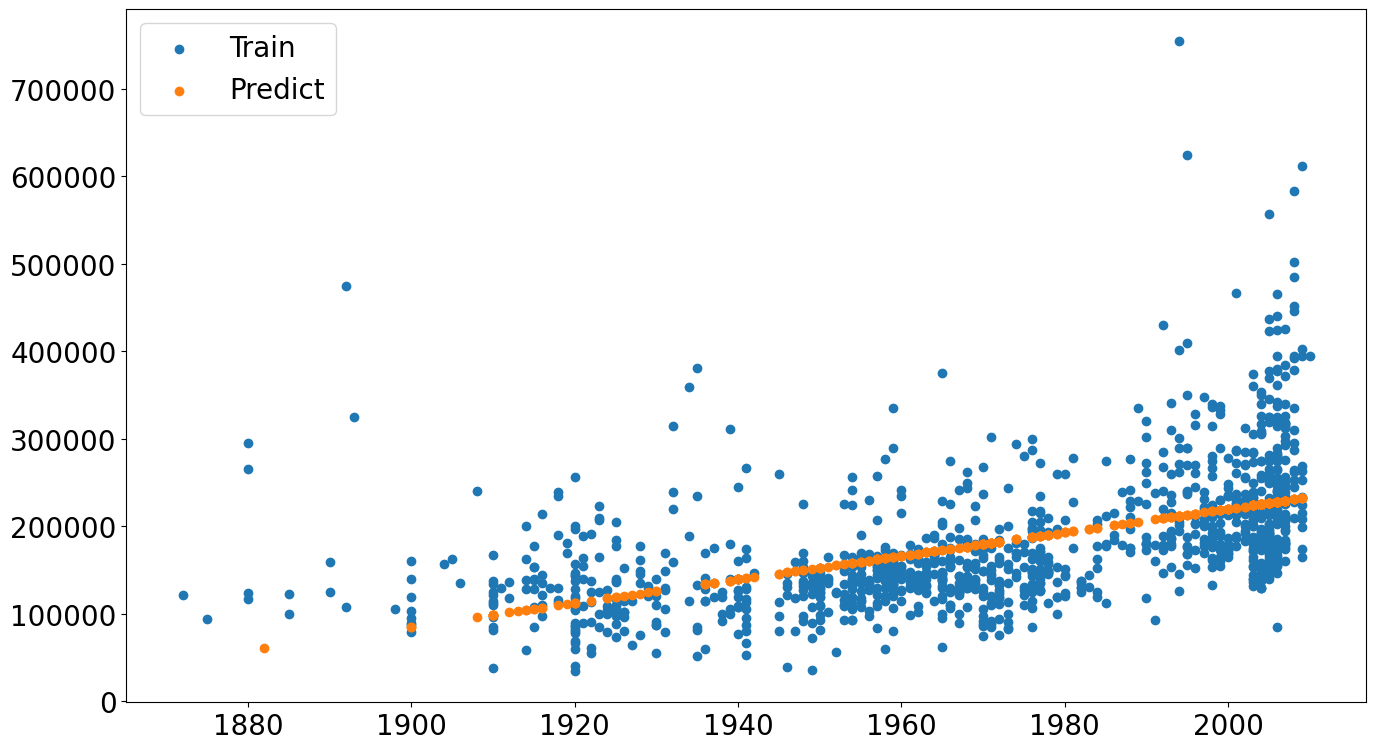

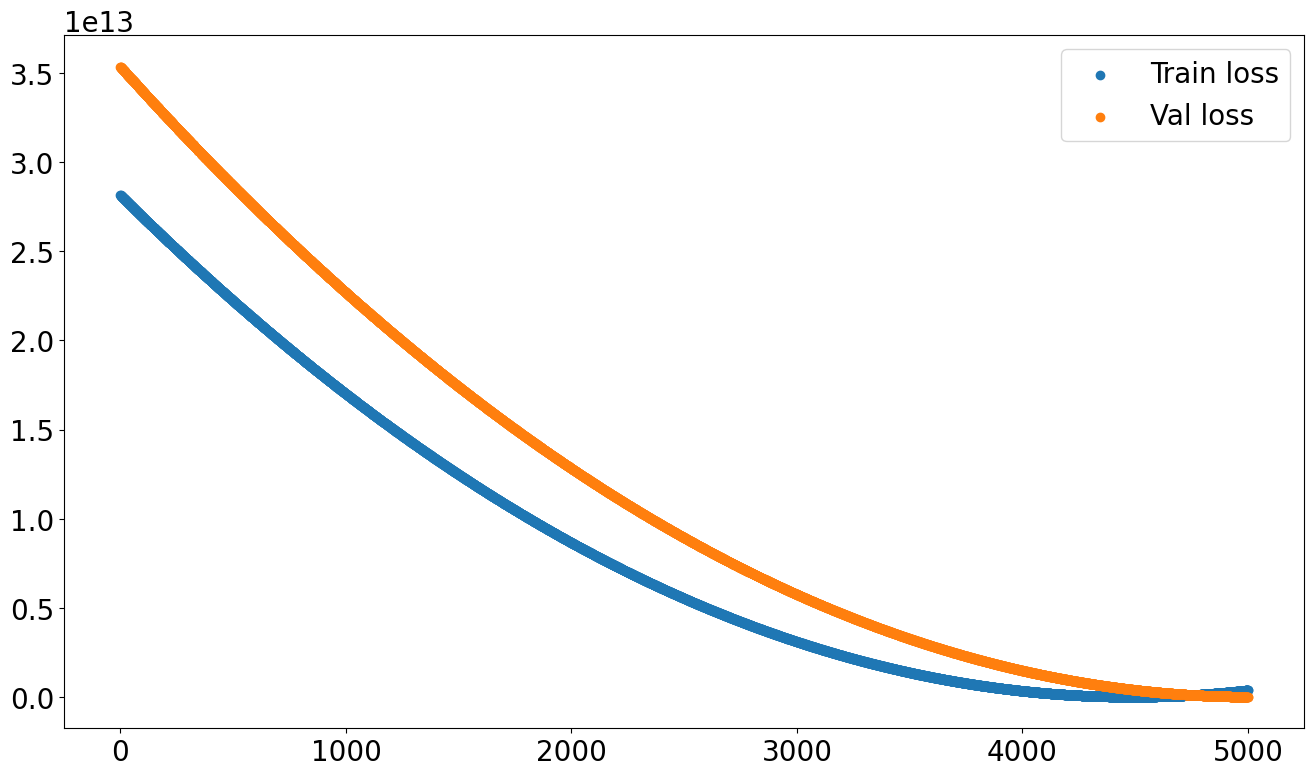

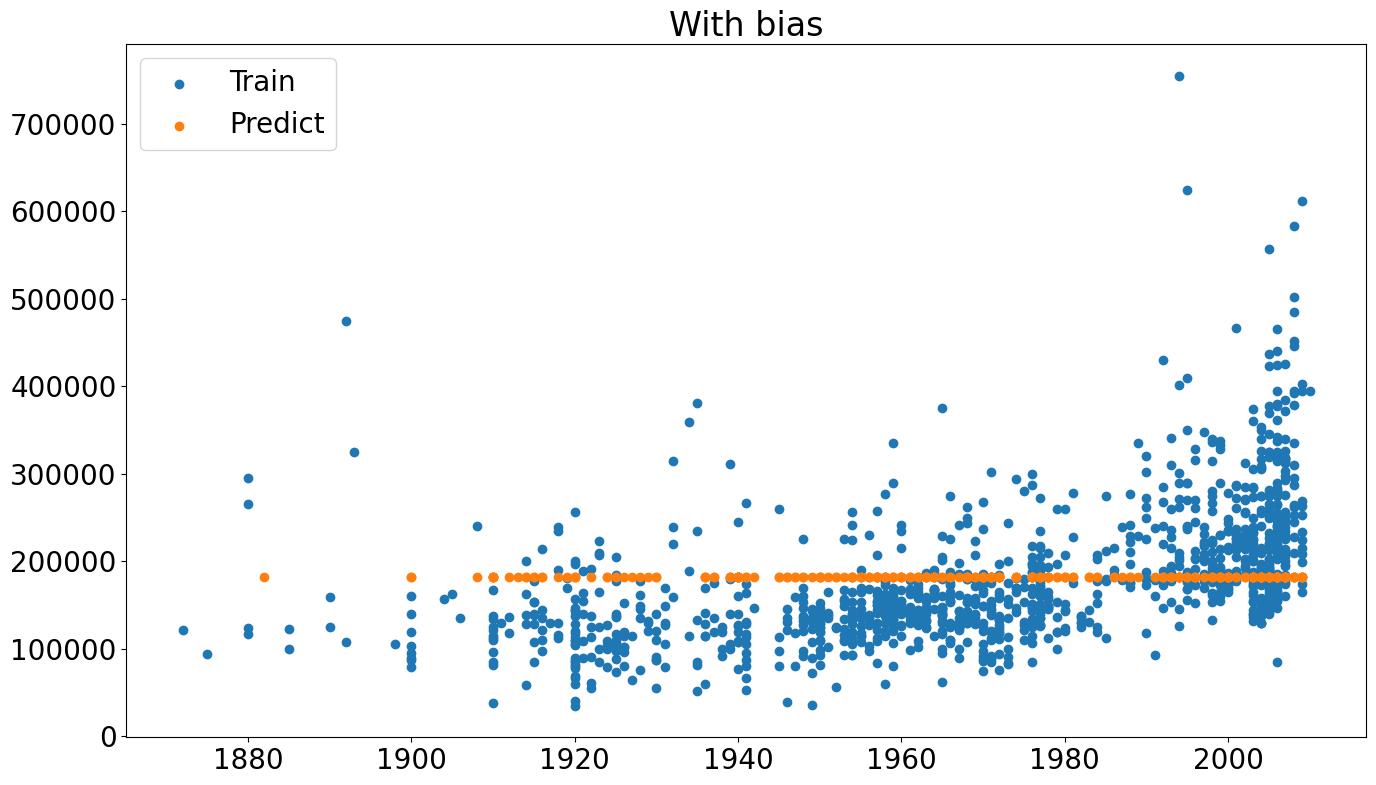

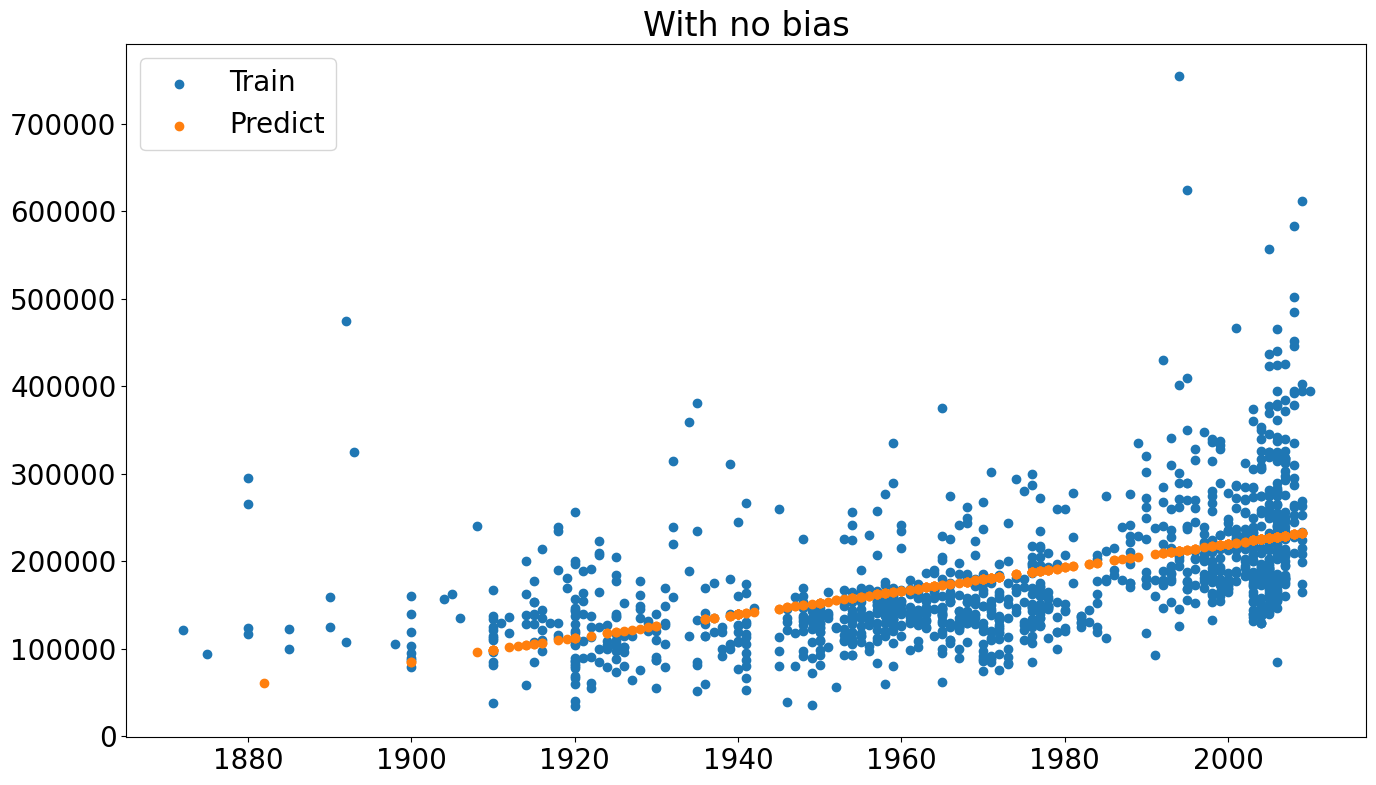

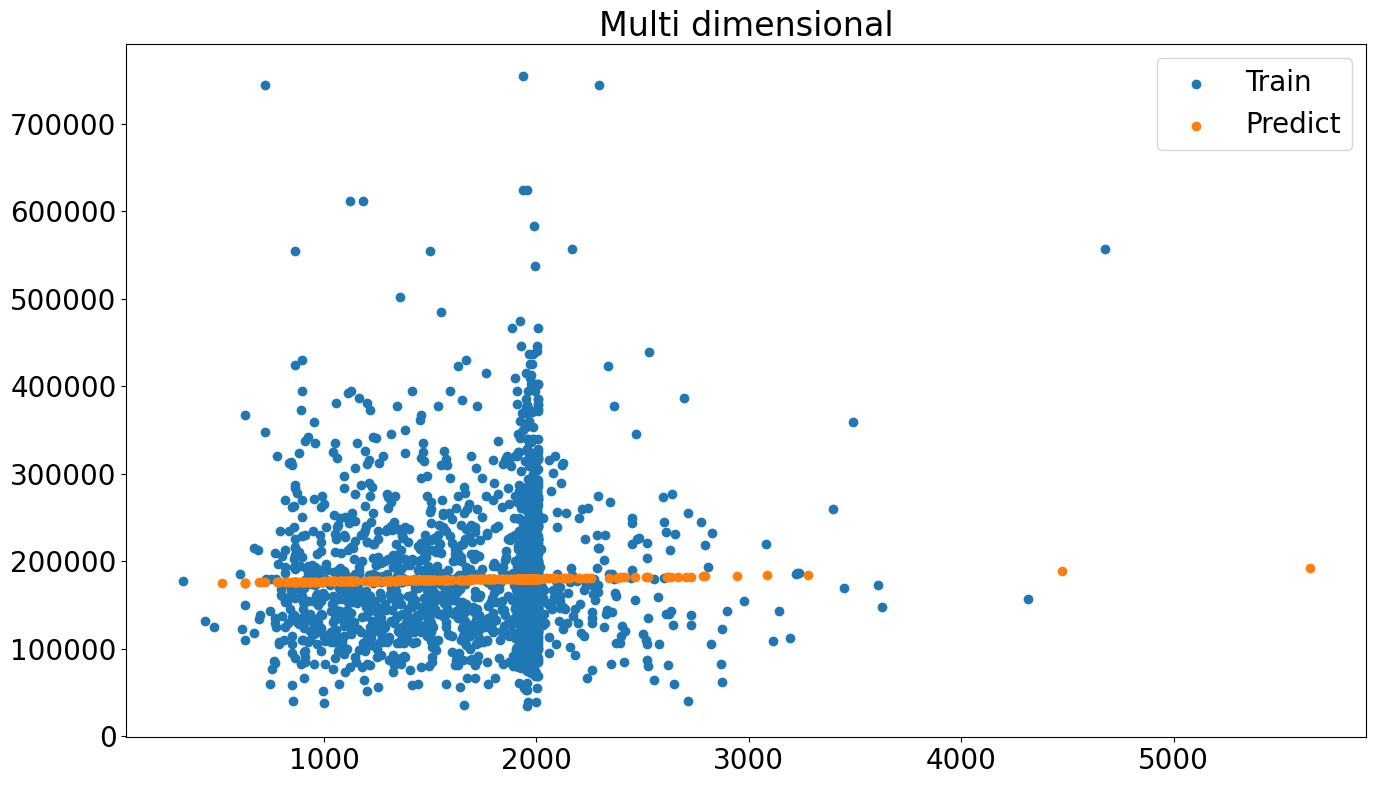

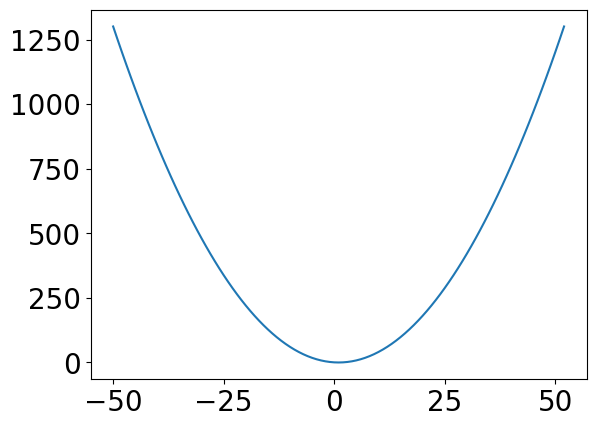

In [60]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ScratchLinearRegression():  
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    # Problem 1: Hypothetical function  
    # ----------------------------------
    def _linear_hypothesis(self, X):
        if self.no_bias != True:
            X = np.hstack([np.c_[np.ones(X.shape[0])],np.c_[X]]) 
        return X
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        X = self._linear_hypothesis(X)
        y = np.resize(y,X.shape)
        
        X_mean = X.mean()
        y_mean = y.mean()
        
        part_1 = X-X_mean
        
        part_2 = y-y_mean
        
        covariance = np.sum(part_1 * part_2)
        variance = np.sum(part_1**2)
        
        # calculating the last values of the formula
        B1 = covariance/variance
        B0 = y_mean - np.multiply(B1,X_mean)
        
        self.B1 = B1
        self.B0 = B0
        self.coef_ = [self.B0,self.B0]
        self.n = len(X)
        
        if (X_val is not None) and (y_val is not None): 
            val_X = self._linear_hypothesis(X_val)
            val_y = np.resize(y_val,val_X.shape)

            val_X_mean = val_X.mean()
            val_y_mean = val_y.mean()
            
            val_part_1 = val_X-val_X_mean
            
            val_part_2 = val_y-val_y_mean

            val_covariance = np.sum(val_part_1 * val_part_2)
            val_variance = np.sum(val_part_1**2)

            # calculating the last values of the formula
            val_B1 = val_covariance/val_variance
            val_B0 = val_y_mean - np.multiply(val_B1,val_X_mean)

            self.val_B1 = val_B1
            self.val_B0 = val_B0
            self.val_X = val_X
            self.val_y = val_y
            # temp prediction for gradient descent
            self._gradient_descent(X, y)
        
        if self.verbose:
            #Outputs the learning process when is set to True
            print("loss {}, val loss {}".format(self.loss, self.val_loss))
        pass
        
    def predict(self, X):
        predictions = self.B0 + np.multiply(self.B1,X)
        self.y_pred = predictions
        pass
        return predictions
    
    # Problem 2: Steepest descent
    # ---------------------------
    def _gradient_descent(self, X, y):
        b1 = self.B1
        b0 = self.B0
        val_b1 = self.val_B1
        val_b0 = self.val_B0
        n = self.n
        
        for i in range(self.iter):
            temp_predictions = b0 - np.multiply(b1,X)
            error = y-temp_predictions
            val_temp_predictions = val_b0 - np.multiply(val_b1,self.val_X)
            val_error = self.val_y - val_temp_predictions
            
            # for train
            b1 = b1 - self.lr
            b0 = b0 - self.lr
            
            # for validation
            val_b1 = val_b1 - self.lr
            val_b0 = val_b0 - self.lr
            
            self.loss[i] = ((error)**2).mean()
            self.val_loss[i] = ((val_error)**2).mean()

        
# problem 1: Hypothetical function
# --------------------------------
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values

plt.scatter(X[:,0], y)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
theta = np.random.random_sample(X.shape[1])
np.dot(X,theta)

# Problem 3: Estimated
# --------------------
l_regressor = ScratchLinearRegression(num_iter=10, lr=0.08, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred


l_regressor = LinearRegression()
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)
y_pred

# Problem 4: Mean squared error
# -----------------------------
def MSE(y_pred, y):
    return np.mean((y_pred - y)**2)

print(MSE(y_test,y_pred))
mean_squared_error(y_pred, y_test)


# Problem 5: Objective function
# -----------------------------
l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=True)
l_regressor.fit(X_train,y_train,X_test,y_test)


# Problem 6: Learning and estimation
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();
plt.show()

l_regressor_1 = LinearRegression()
l_regressor_1.fit(X_train,y_train)
y_pred_1 = l_regressor_1.predict(X_test)
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred_1,label="Predict")
plt.legend()
plt.plot();
plt.show()

# problem 7: Plotting the learning curve 
# --------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=5000, lr=0.6, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train,X_test,y_test)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regressor.loss)),l_regressor.loss,label='Train loss')
plt.scatter(range(len(l_regressor.val_loss)),l_regressor.val_loss,label='Val loss')
plt.legend()
plt.plot();
plt.show()

# problem 8: (Advance task) Removal of bias term
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=False, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();
plt.show()


l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("With no bias")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();
plt.show()

# problem 9: (Advance task) Multidimensional feature quantity
# -----------------------------------------------------------
# separating them into variables
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
y = np.resize(y,X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

l_regressor = ScratchLinearRegression(num_iter=9, lr=0.0001, no_bias=True, verbose=False)
l_regressor.fit(X_train,y_train)
y_pred = l_regressor.predict(X_test)

fig,ax = plt.subplots(figsize=(16,9))

plt.title("Multi dimensional")
plt.rcParams["font.size"] = 20
plt.scatter(X_train,y_train,label="Train")
plt.scatter(X_test,y_pred,label="Predict")
plt.legend()
plt.plot();
plt.show()


# problem 10: (Advance task) Derivation of update formula
# -------------------------------------------------------
# The equation is derived by J(θ)=1/2mΣ(θx-y)^2 = 1/2mΣ((xθ)^2 -2yxθ +y^2)
# we then devide the derivatives ΔJ(θ)/Δθ
# and then = 1/2mΣ(2x^2θ -2yx) = 1/mΣ x(xθ -y)

# Problem 11: (Advance task) Problem of local optimum solution
# ------------------------------------------------------------
# It is possible to find the optimum solution, where gradient descent will be equal to zero but depending 
# on what you are working with you might have many upward and downward and when you reach a low point doesn't 
# necessarly mean you have the optimum solution

numbers = np.arange(-50,53,1)
equ = 1/2*(numbers-1)**2
plt.plot(numbers,equ);
plt.show()

